In [204]:
# GENERATING THE DATA FOR CSV FILES
import numpy as np
from random import random
from random import shuffle
import csv
import math
import pandas as pd
import matplotlib.pyplot as plt
# Generates a list containing n-number of factors

#seed for consistent results
np.random.seed(0)

#creates the column headers for the factors
def populate_factors(n):
    s = 'Factor '
    f = [s+str(i) for i in range(1,n+1)]
    return f

# Randomly generates a list of sigma values (std deviations) corresponding to the number of factors between [0.1,0.3] 
def get_std_devs(factors):
    std_devs = []
    for i in factors:
        
        # Sampling from adding a normal and a uniform distribution to get the standard deviations for each factor
        # the sum of the normal and uniform was done to sample from a distribution that is uniform-like but has
        # potential for extreme values
        v = np.random.normal(0,.05,1) + np.random.uniform(0.1,0.25,1)
        std_devs.append(v)
    return std_devs

# This iterates over the factors to build covariance between factors as is seen in real-market factors
# Factors are are covariant with varrying numbers of other factors
def addCov(facts):
    df = pd.DataFrame(pct_changes).transpose()
    num_facts = len(facts)
    count = 0
    
    indices = [i for i in range(0, num_facts)]
    shuffle(indices)
    
    for j in indices:
        num_cov = (int)(np.random.uniform(0,num_facts/2,1))
        if num_cov > 0:
            covs = (np.random.uniform(1,num_facts,num_cov))
            weight = 1 / num_cov


            temp = df.iloc[:, j].copy()# / 4.0
            df.iloc[:, j] = df.iloc[:,j] * 0
            for i in covs:

                df.iloc[:, j] = df.iloc[:,j] + df.iloc[:,(int)(i)] * weight

            
            df.iloc[:, j] = df.iloc[:,j] * 3 + temp
        count += 1


    return list(df.transpose().values)
    
    
        
    
# Samples from a normal distribution n-times to get the pct change for n-number of data points using the sigma values generated
def get_pct_changes(n,std_devs):
    p = []
    for dev in std_devs:
        # s is a list, so pct changes is a list of lists
        s = list(np.random.normal(0,dev,n))
        p.append(s)
        
    
    return p


# Calculates the returns on index based on time-units
def get_returns(pct_changes,numDataPoints):
    rets = []

    num_returns = numDataPoints
    i = 0
    tmp = 0
    factor_number = 0;
    while(i!=num_returns):
        summing = 0
        factor_number = 0
        for factor_change in pct_changes:
            factor_number+=1
            
            #each factor has slightly more influence on the returns
            tmp = max( 1*factor_number - 30,0 )
            
            #the weight of each factor is sampled from a uniform distribution
            w = np.random.uniform(0.1*tmp,1.4*tmp)
            
            #adds the weighted factor component plus some normally distributed noise
            summing+=w*factor_change[i] + np.random.normal(0,.5,1)

        rets.append(summing)
        i+=1
    return rets



def add_jumps(pcts):
    
    for i in range(1,numFactors):
        pcts[i] += np.random.poisson(.1, numDataPoints) * np.random.normal(0, .1, numDataPoints)
        
    return pcts
        

numFactors=100
numDataPoints = 1000


factors = populate_factors(numFactors)
std_devs = get_std_devs(factors)
pct_changes = get_pct_changes(numDataPoints,std_devs)
pct_changes2 = addCov(pct_changes)
pct_changes2 = add_jumps(pct_changes2)
returns = get_returns(pct_changes2,numDataPoints)





print(max(returns))
print(min(returns))
print(sum(returns)/len(returns))



[2092.32280055]
[-1809.80728623]
[17.53738159]


In [205]:
df = pd.DataFrame(pct_changes2).transpose()

In [207]:
df.to_csv("./percent_changes.csv")

In [206]:
df2 = pd.DataFrame(returns)

In [208]:

df2.to_csv("./returns.csv")

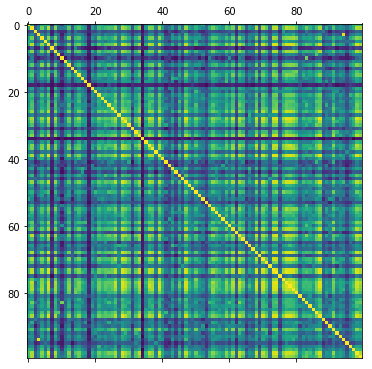

In [209]:
plt.matshow(df.corr())

In [147]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,-0.040625,-0.034035,-0.003401,0.020638,0.076682,0.001278,0.030930,0.031193,-0.040298,...,0.091470,0.023083,0.048277,0.027070,-0.007745,-0.009952,-0.009282,-0.014987,0.055730,-0.006680
1,-0.040625,1.000000,0.018363,0.045693,-0.030201,0.067948,-0.002561,-0.005327,-0.015446,0.010363,...,0.037836,-0.027068,0.055436,0.066178,0.018924,0.025899,0.037641,-0.020140,0.040974,0.020756
2,-0.034035,0.018363,1.000000,0.002508,0.098021,-0.048020,0.033992,0.005491,-0.008408,0.018892,...,-0.003922,0.002999,-0.052535,-0.079551,-0.023952,0.010196,-0.025946,0.004793,0.044477,0.024217
3,-0.003401,0.045693,0.002508,1.000000,0.024012,-0.022231,0.000622,0.038581,-0.051841,-0.002850,...,0.125779,0.016456,-0.005715,-0.001466,0.011101,-0.030027,0.013393,0.069197,0.081524,0.057853
4,0.020638,-0.030201,0.098021,0.024012,1.000000,-0.027025,0.057044,-0.027803,-0.003343,-0.044048,...,-0.002422,0.066848,0.040355,0.031166,0.058426,0.055276,0.066826,0.052998,0.007685,0.051635
5,0.076682,0.067948,-0.048020,-0.022231,-0.027025,1.000000,0.026569,0.032793,0.052486,-0.030444,...,0.039874,-0.026565,0.017271,0.036233,0.070785,0.070865,0.045817,0.008035,-0.007945,0.004580
6,0.001278,-0.002561,0.033992,0.000622,0.057044,0.026569,1.000000,0.064097,-0.009909,-0.001376,...,-0.006734,0.022208,0.013627,0.058123,-0.027958,-0.032273,0.038689,0.046053,0.053563,0.042963
7,0.030930,-0.005327,0.005491,0.038581,-0.027803,0.032793,0.064097,1.000000,0.029349,0.007791,...,0.068838,-0.012201,0.002827,-0.010555,0.022950,-0.047796,0.009769,-0.065833,0.077844,0.011262
8,0.031193,-0.015446,-0.008408,-0.051841,-0.003343,0.052486,-0.009909,0.029349,1.000000,0.052125,...,0.025895,0.036114,0.028876,0.054551,-0.028261,0.081890,-0.002965,0.016246,0.105356,0.049721
9,-0.040298,0.010363,0.018892,-0.002850,-0.044048,-0.030444,-0.001376,0.007791,0.052125,1.000000,...,0.001174,0.000069,-0.042993,0.034516,-0.043823,-0.026833,-0.033195,0.011506,-0.042693,0.055973
